# Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")


# Visualisation

In [2]:
series = pd.read_excel('C:/Users/HP/Desktop/ExcelR/Data Science/Python/Assignments/Forecasting/CocaCola_Sales_Rawdata.xlsx')
series.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [3]:
series[['q','year']] = series.Quarter.str.split('_', expand=True)
series.year = series.year.astype(int) +1900
series.q = series.q
series.Quarter = pd.to_datetime(series['year'].astype(str) +  series['q'].astype(str))
series = series.drop('q',axis=1)
series = series.drop('year',axis=1)
series.set_index('Quarter', inplace=True)
series.head()

,Sales
Quarter,
1986-01-01,1734.827000
1986-04-01,2244.960999
1986-07-01,2533.804993
1986-10-01,2154.962997
1987-01-01,1547.818996


In [4]:
series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42 entries, 1986-01-01 to 1996-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   42 non-null     float64
dtypes: float64(1)
memory usage: 672.0 bytes


In [5]:
series.index

DatetimeIndex(['1986-01-01', '1986-04-01', '1986-07-01', '1986-10-01',
               '1987-01-01', '1987-04-01', '1987-07-01', '1987-10-01',
               '1988-01-01', '1988-04-01', '1988-07-01', '1988-10-01',
               '1989-01-01', '1989-04-01', '1989-07-01', '1989-10-01',
               '1990-01-01', '1990-04-01', '1990-07-01', '1990-10-01',
               '1991-01-01', '1991-04-01', '1991-07-01', '1991-10-01',
               '1992-01-01', '1992-04-01', '1992-07-01', '1992-10-01',
               '1993-01-01', '1993-04-01', '1993-07-01', '1993-10-01',
               '1994-01-01', '1994-04-01', '1994-07-01', '1994-10-01',
               '1995-01-01', '1995-04-01', '1995-07-01', '1995-10-01',
               '1996-01-01', '1996-04-01'],
              dtype='datetime64[ns]', name='Quarter', freq=None)

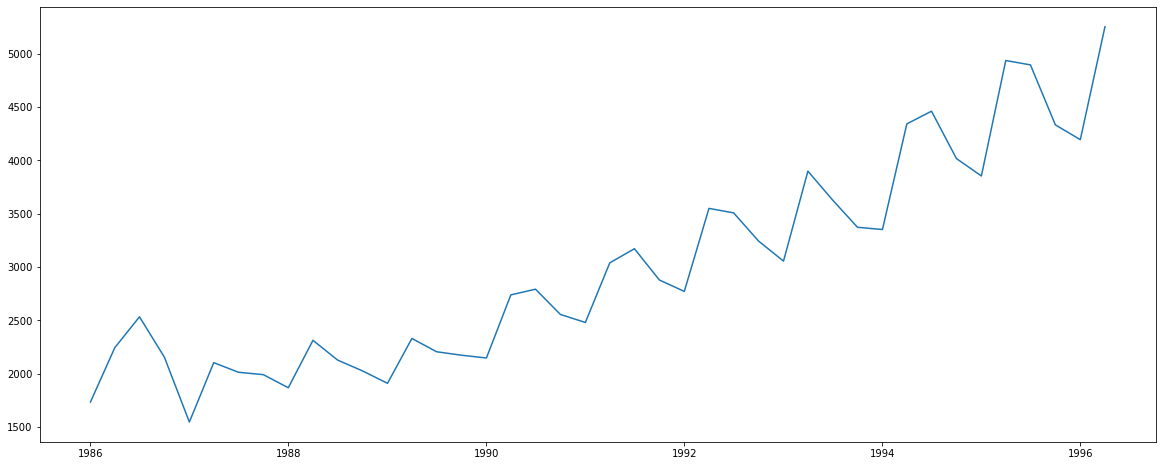

In [6]:
plt.figure(figsize = (20,8))
plt.plot(series)

#### Histogram and Density Plots

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

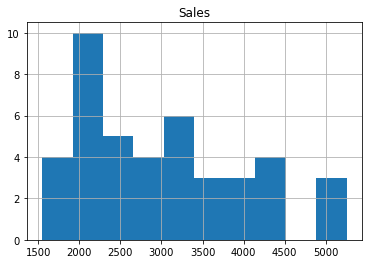

In [7]:
# create a histogram plot
series.hist()

<AxesSubplot:ylabel='Density'>

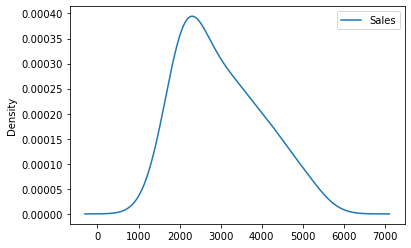

In [8]:
# create a density plot
series.plot(kind='kde')

#### Box and Whisker Plots by Interval

In [9]:
# create a boxplot of yearly data

series = pd.read_excel('C:/Users/HP/Desktop/ExcelR/Data Science/Python/Assignments/Forecasting/CocaCola_Sales_Rawdata.xlsx')
series[['q','year']] = series.Quarter.str.split('_', expand=True)
series.year = series.year.astype(int) +1900
series.q = series.q
series.Quarter = pd.to_datetime(series['year'].astype(str) +  series['q'].astype(str))
series = series.drop('q',axis=1)
series = series.drop('year',axis=1)
series.set_index('Quarter', inplace=True)
series = series.squeeze()
series

Quarter
1986-01-01    1734.827000
1986-04-01    2244.960999
1986-07-01    2533.804993
1986-10-01    2154.962997
1987-01-01    1547.818996
1987-04-01    2104.411995
1987-07-01    2014.362999
1987-10-01    1991.746998
1988-01-01    1869.049999
1988-04-01    2313.631996
1988-07-01    2128.320000
1988-10-01    2026.828999
1989-01-01    1910.603996
1989-04-01    2331.164993
1989-07-01    2206.549995
1989-10-01    2173.967995
1990-01-01    2148.278000
1990-04-01    2739.307999
1990-07-01    2792.753998
1990-10-01    2556.009995
1991-01-01    2480.973999
1991-04-01    3039.522995
1991-07-01    3172.115997
1991-10-01    2879.000999
1992-01-01    2772.000000
1992-04-01    3550.000000
1992-07-01    3508.000000
1992-10-01    3243.859993
1993-01-01    3056.000000
1993-04-01    3899.000000
1993-07-01    3629.000000
1993-10-01    3373.000000
1994-01-01    3352.000000
1994-04-01    4342.000000
1994-07-01    4461.000000
1994-10-01    4017.000000
1995-01-01    3854.000000
1995-04-01    4936.000000
1995

In [10]:
type(series)

pandas.core.series.Series

#### Lag plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

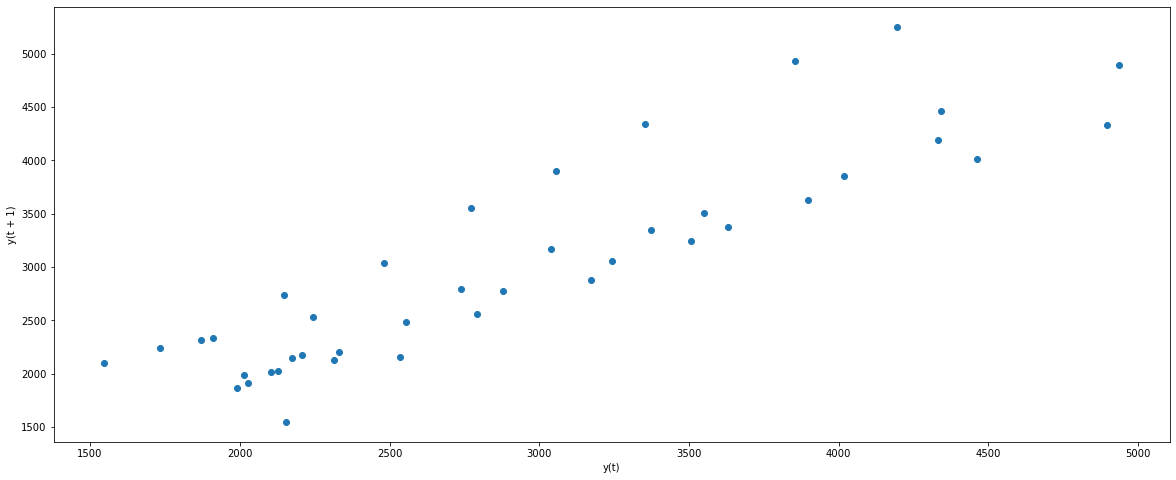

In [11]:
# create a scatter plot
plt.figure(figsize = (20,8))
pd.plotting.lag_plot(series)

<Figure size 2880x720 with 0 Axes>

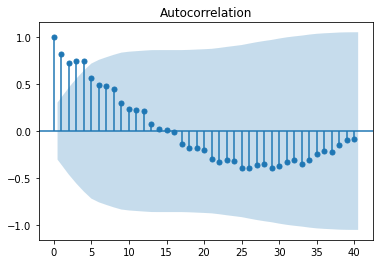

In [12]:
# create an autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize = (40,10))
plot_acf(series, lags=40)
plt.show()

# Sampling and Transformation

#### Upsampling Data

In [13]:
series = pd.read_excel('C:/Users/HP/Desktop/ExcelR/Data Science/Python/Assignments/Forecasting/CocaCola_Sales_Rawdata.xlsx')
series[['q','year']] = series.Quarter.str.split('_', expand=True)
series.year = series.year.astype(int) +1900
series.q = series.q
series.Quarter = pd.to_datetime(series['year'].astype(str) +  series['q'].astype(str))
series = series.drop('q',axis=1)
series = series.drop('year',axis=1)
series.set_index('Quarter', inplace=True,)
series = series.squeeze()
series

Quarter
1986-01-01    1734.827000
1986-04-01    2244.960999
1986-07-01    2533.804993
1986-10-01    2154.962997
1987-01-01    1547.818996
1987-04-01    2104.411995
1987-07-01    2014.362999
1987-10-01    1991.746998
1988-01-01    1869.049999
1988-04-01    2313.631996
1988-07-01    2128.320000
1988-10-01    2026.828999
1989-01-01    1910.603996
1989-04-01    2331.164993
1989-07-01    2206.549995
1989-10-01    2173.967995
1990-01-01    2148.278000
1990-04-01    2739.307999
1990-07-01    2792.753998
1990-10-01    2556.009995
1991-01-01    2480.973999
1991-04-01    3039.522995
1991-07-01    3172.115997
1991-10-01    2879.000999
1992-01-01    2772.000000
1992-04-01    3550.000000
1992-07-01    3508.000000
1992-10-01    3243.859993
1993-01-01    3056.000000
1993-04-01    3899.000000
1993-07-01    3629.000000
1993-10-01    3373.000000
1994-01-01    3352.000000
1994-04-01    4342.000000
1994-07-01    4461.000000
1994-10-01    4017.000000
1995-01-01    3854.000000
1995-04-01    4936.000000
1995

In [14]:
upsampled = series.resample('D').mean()
upsampled.head(182)

Quarter
1986-01-01    1734.827000
1986-01-02            NaN
1986-01-03            NaN
1986-01-04            NaN
1986-01-05            NaN
                 ...     
1986-06-27            NaN
1986-06-28            NaN
1986-06-29            NaN
1986-06-30            NaN
1986-07-01    2533.804993
Freq: D, Name: Sales, Length: 182, dtype: float64

In [15]:
upsampled.shape

(3744,)

#### Interpolate the missing value

In [16]:
interpolated = upsampled.interpolate(method='linear')
interpolated.head(182)

Quarter
1986-01-01    1734.827000
1986-01-02    1740.495155
1986-01-03    1746.163311
1986-01-04    1751.831466
1986-01-05    1757.499622
                 ...     
1986-06-27    2521.108553
1986-06-28    2524.282663
1986-06-29    2527.456773
1986-06-30    2530.630883
1986-07-01    2533.804993
Freq: D, Name: Sales, Length: 182, dtype: float64

<AxesSubplot:xlabel='Quarter'>

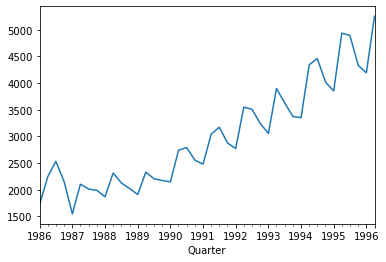

In [17]:
interpolated.plot()

<AxesSubplot:xlabel='Quarter'>

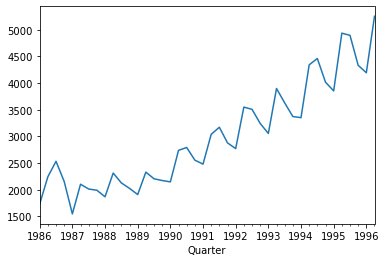

In [18]:
series.plot()

#### Lag plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

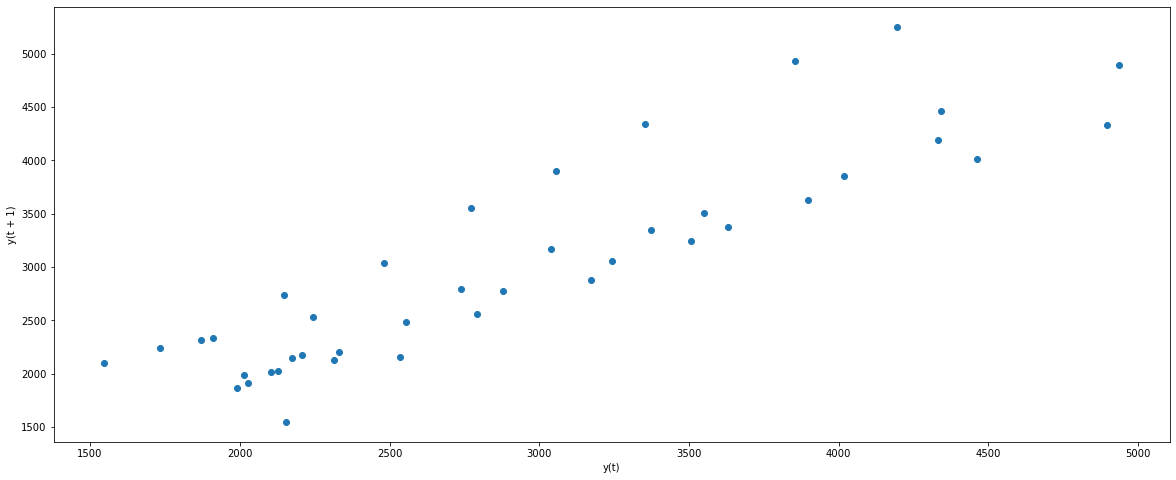

In [19]:
# create a scatter plot
plt.figure(figsize = (20,8))
pd.plotting.lag_plot(series)

#### Downsampling Data

In [20]:
# downsample to Yearly intervals
resample = series.resample('Y')
yearly_mean_sales = resample.mean()

In [21]:
yearly_mean_sales.head()

Quarter
1986-12-31    2167.138997
1987-12-31    1914.585247
1988-12-31    2084.457748
1989-12-31    2155.571745
1990-12-31    2559.087498
Freq: A-DEC, Name: Sales, dtype: float64

<AxesSubplot:xlabel='Quarter'>

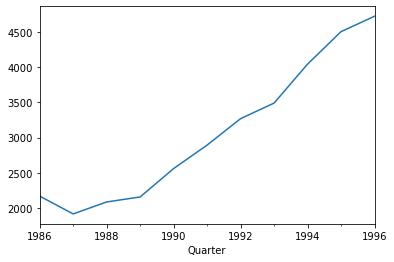

In [22]:
yearly_mean_sales.plot()

#### Tranformations

In [23]:
# load and plot a time series
series = pd.read_excel('C:/Users/HP/Desktop/ExcelR/Data Science/Python/Assignments/Forecasting/CocaCola_Sales_Rawdata.xlsx')
series[['q','year']] = series.Quarter.str.split('_', expand=True)
series.year = series.year.astype(int) +1900
series.q = series.q
series.Quarter = pd.to_datetime(series['year'].astype(str) +  series['q'].astype(str))
series = series.drop('q',axis=1)
series = series.drop('year',axis=1)
series.set_index('Quarter', inplace=True,)
series = series.squeeze()
series

Quarter
1986-01-01    1734.827000
1986-04-01    2244.960999
1986-07-01    2533.804993
1986-10-01    2154.962997
1987-01-01    1547.818996
1987-04-01    2104.411995
1987-07-01    2014.362999
1987-10-01    1991.746998
1988-01-01    1869.049999
1988-04-01    2313.631996
1988-07-01    2128.320000
1988-10-01    2026.828999
1989-01-01    1910.603996
1989-04-01    2331.164993
1989-07-01    2206.549995
1989-10-01    2173.967995
1990-01-01    2148.278000
1990-04-01    2739.307999
1990-07-01    2792.753998
1990-10-01    2556.009995
1991-01-01    2480.973999
1991-04-01    3039.522995
1991-07-01    3172.115997
1991-10-01    2879.000999
1992-01-01    2772.000000
1992-04-01    3550.000000
1992-07-01    3508.000000
1992-10-01    3243.859993
1993-01-01    3056.000000
1993-04-01    3899.000000
1993-07-01    3629.000000
1993-10-01    3373.000000
1994-01-01    3352.000000
1994-04-01    4342.000000
1994-07-01    4461.000000
1994-10-01    4017.000000
1995-01-01    3854.000000
1995-04-01    4936.000000
1995

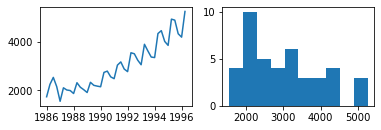

In [24]:
# line plot
plt.subplot(221)
plt.plot(series)

# histogram
plt.subplot(222)
plt.hist(series)

plt.show()

#### Square Root Transform

In [25]:
dataframe = pd.DataFrame(np.sqrt(series.values), columns = ['Sales'])
dataframe

,Sales
0,41.651254
1,47.381019
2,50.336915
3,46.421579
4,39.342331
5,45.873871
6,44.881655
7,44.628993
8,43.232511
9,48.100229


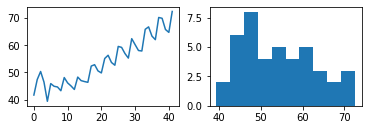

In [26]:
# line plot
plt.subplot(221)
plt.plot(dataframe['Sales'])

# histogram
plt.subplot(222)
plt.hist(dataframe['Sales'])
plt.show()

#### Log Transform

In [27]:
dataframe = pd.DataFrame(np.log(series.values), columns = ['Sales'])
dataframe

,Sales
0,7.458663
1,7.716443
2,7.837477
3,7.675529
4,7.344602
5,7.651791
6,7.608058
7,7.596767
8,7.533186
9,7.746574


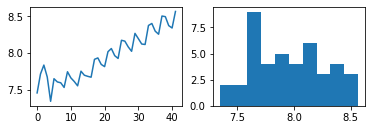

In [28]:
# line plot
plt.subplot(221)
plt.plot(dataframe['Sales'])

# histogram
plt.subplot(222)
plt.hist(dataframe['Sales'])
plt.show()

# Forecasting - Model Based

In [29]:
series = pd.read_excel('C:/Users/HP/Desktop/ExcelR/Data Science/Python/Assignments/Forecasting/CocaCola_Sales_Rawdata.xlsx')
series[['q','year']] = series.Quarter.str.split('_', expand=True)
series.year = series.year.astype(int) +1900
series.q = series.q
series.Quarter = pd.to_datetime(series['year'].astype(str) +  series['q'].astype(str))
series = series.drop('q',axis=1)
series = series.drop('year',axis=1)
series.head()

,Quarter,Sales
0,1986-01-01,1734.827000
1,1986-04-01,2244.960999
2,1986-07-01,2533.804993
3,1986-10-01,2154.962997
4,1987-01-01,1547.818996


In [30]:
# Extracting Day, weekday name, month name, year from the Date column using 
# Date functions from pandas 

series["month"] = series['Quarter'].dt.strftime("%b") # month extraction
series["year"] = series['Quarter'].dt.strftime("%Y") # year extraction
series["Day"] = series['Quarter'].dt.strftime("%d") # Day extraction
series["wkday"] = series['Quarter'].dt.strftime("%A") # weekday extraction

In [31]:
series

,Quarter,Sales,month,year,Day,wkday
0,1986-01-01,1734.827000,Jan,1986,01,Wednesday
1,1986-04-01,2244.960999,Apr,1986,01,Tuesday
2,1986-07-01,2533.804993,Jul,1986,01,Tuesday
3,1986-10-01,2154.962997,Oct,1986,01,Wednesday
4,1987-01-01,1547.818996,Jan,1987,01,Thursday
5,1987-04-01,2104.411995,Apr,1987,01,Wednesday
6,1987-07-01,2014.362999,Jul,1987,01,Wednesday
7,1987-10-01,1991.746998,Oct,1987,01,Thursday
8,1988-01-01,1869.049999,Jan,1988,01,Friday
9,1988-04-01,2313.631996,Apr,1988,01,Friday


In [32]:
heatmap_y_month = pd.pivot_table(data = series,
                                 values = "Sales",
                                 index = "year",
                                 columns = "month",
                                 aggfunc = "mean",
                                 fill_value=0)
heatmap_y_month

month,Apr,Jan,Jul,Oct
year,,,,
1986,2244.960999,1734.827000,2533.804993,2154.962997
1987,2104.411995,1547.818996,2014.362999,1991.746998
1988,2313.631996,1869.049999,2128.320000,2026.828999
1989,2331.164993,1910.603996,2206.549995,2173.967995
1990,2739.307999,2148.278000,2792.753998,2556.009995
1991,3039.522995,2480.973999,3172.115997,2879.000999
1992,3550.000000,2772.000000,3508.000000,3243.859993
1993,3899.000000,3056.000000,3629.000000,3373.000000
1994,4342.000000,3352.000000,4461.000000,4017.000000


<AxesSubplot:xlabel='month', ylabel='year'>

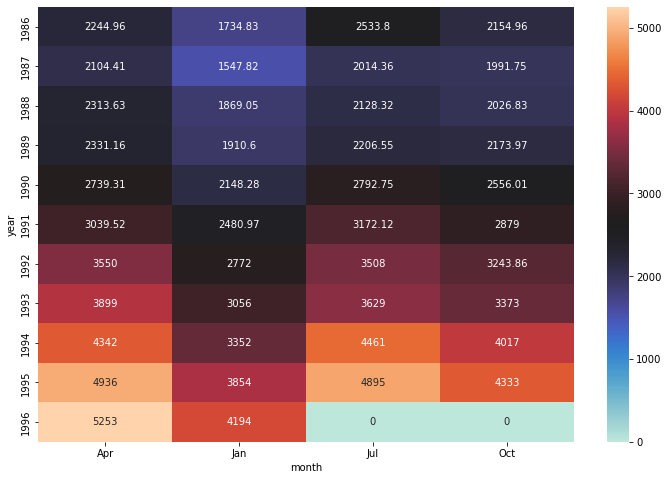

In [33]:
plt.figure(figsize=(12,8))
sns.heatmap(heatmap_y_month,
            annot=True,
            fmt="g",
            cmap = 'icefire') 

<AxesSubplot:xlabel='year', ylabel='Sales'>

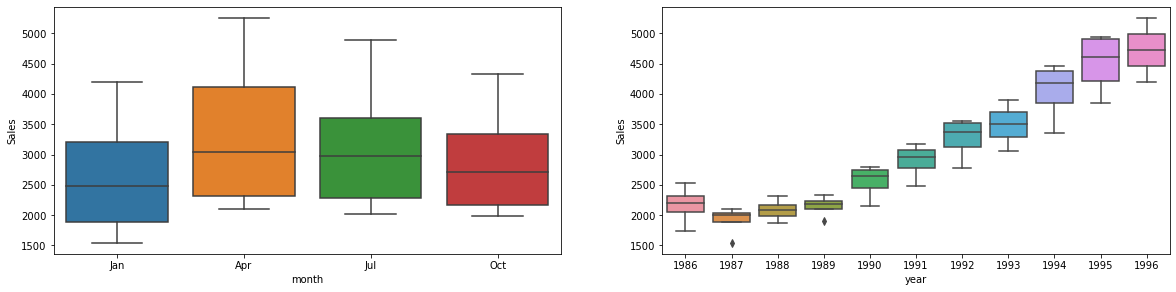

In [34]:
# Boxplot for every
plt.figure(figsize=(20,10))

plt.subplot(221)
sns.boxplot(x="month",y="Sales",data=series)

plt.subplot(222)
sns.boxplot(x="year",y="Sales",data=series)

<AxesSubplot:xlabel='year', ylabel='Sales'>

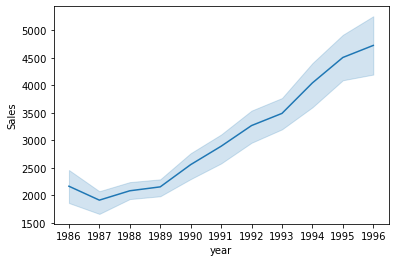

In [35]:
sns.lineplot(x="year",y="Sales",data=series)

#### Splitting data

In [36]:
series.shape

(42, 6)

In [37]:
series['t'] = np.arange(1,43)
series['t_square'] = np.square(series.t)
series['log_sales'] = np.log(series.Sales)
series1 = pd.get_dummies(series['month'])
series = pd.concat([series, series1],axis=1)
series

,Quarter,Sales,month,year,Day,wkday,t,t_square,log_sales,Apr,Jan,Jul,Oct
0,1986-01-01,1734.827000,Jan,1986,01,Wednesday,1,1,7.458663,0,1,0,0
1,1986-04-01,2244.960999,Apr,1986,01,Tuesday,2,4,7.716443,1,0,0,0
2,1986-07-01,2533.804993,Jul,1986,01,Tuesday,3,9,7.837477,0,0,1,0
3,1986-10-01,2154.962997,Oct,1986,01,Wednesday,4,16,7.675529,0,0,0,1
4,1987-01-01,1547.818996,Jan,1987,01,Thursday,5,25,7.344602,0,1,0,0
5,1987-04-01,2104.411995,Apr,1987,01,Wednesday,6,36,7.651791,1,0,0,0
6,1987-07-01,2014.362999,Jul,1987,01,Wednesday,7,49,7.608058,0,0,1,0
7,1987-10-01,1991.746998,Oct,1987,01,Thursday,8,64,7.596767,0,0,0,1
8,1988-01-01,1869.049999,Jan,1988,01,Friday,9,81,7.533186,0,1,0,0
9,1988-04-01,2313.631996,Apr,1988,01,Friday,10,100,7.746574,1,0,0,0


In [38]:
Train = series.head(34)
Test = series.tail(8)

In [39]:
Train

,Quarter,Sales,month,year,Day,wkday,t,t_square,log_sales,Apr,Jan,Jul,Oct
0,1986-01-01,1734.827000,Jan,1986,01,Wednesday,1,1,7.458663,0,1,0,0
1,1986-04-01,2244.960999,Apr,1986,01,Tuesday,2,4,7.716443,1,0,0,0
2,1986-07-01,2533.804993,Jul,1986,01,Tuesday,3,9,7.837477,0,0,1,0
3,1986-10-01,2154.962997,Oct,1986,01,Wednesday,4,16,7.675529,0,0,0,1
4,1987-01-01,1547.818996,Jan,1987,01,Thursday,5,25,7.344602,0,1,0,0
5,1987-04-01,2104.411995,Apr,1987,01,Wednesday,6,36,7.651791,1,0,0,0
6,1987-07-01,2014.362999,Jul,1987,01,Wednesday,7,49,7.608058,0,0,1,0
7,1987-10-01,1991.746998,Oct,1987,01,Thursday,8,64,7.596767,0,0,0,1
8,1988-01-01,1869.049999,Jan,1988,01,Friday,9,81,7.533186,0,1,0,0
9,1988-04-01,2313.631996,Apr,1988,01,Friday,10,100,7.746574,1,0,0,0


In [40]:
Test

,Quarter,Sales,month,year,Day,wkday,t,t_square,log_sales,Apr,Jan,Jul,Oct
34,1994-07-01,4461.0,Jul,1994,01,Friday,35,1225,8.403128,0,0,1,0
35,1994-10-01,4017.0,Oct,1994,01,Saturday,36,1296,8.298291,0,0,0,1
36,1995-01-01,3854.0,Jan,1995,01,Sunday,37,1369,8.256867,0,1,0,0
37,1995-04-01,4936.0,Apr,1995,01,Saturday,38,1444,8.504311,1,0,0,0
38,1995-07-01,4895.0,Jul,1995,01,Saturday,39,1521,8.495970,0,0,1,0
39,1995-10-01,4333.0,Oct,1995,01,Sunday,40,1600,8.374015,0,0,0,1
40,1996-01-01,4194.0,Jan,1996,01,Monday,41,1681,8.341410,0,1,0,0
41,1996-04-01,5253.0,Apr,1996,01,Monday,42,1764,8.566555,1,0,0,0


In [41]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

720.6137817965259

In [42]:
#Exponential
Exp = smf.ols('log_sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

564.9850937274292

In [43]:
#Quadratic 
Quad = smf.ols('Sales~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

437.7455637558559

In [44]:
#Additive seasonality 
add_sea = smf.ols('Sales~Jan+Apr+Jul+Oct',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Apr','Jul','Oct']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1870.1899069853293

In [45]:
#Additive Seasonality Quadratic 
add_sea_Quad = smf.ols('Sales~t+t_square+Jan+Apr+Jul+Oct',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Apr','Jul','Oct','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

257.67172565362677

In [46]:
##Multiplicative Seasonality
Mul_sea = smf.ols('log_sales~Jan+Apr+Jul+Oct',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1940.8042499186577

In [47]:
#Multiplicative Additive Seasonality 
Mul_Add_sea = smf.ols('log_sales~t+Jan+Apr+Jul+Oct',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

400.42004584362434

In [48]:
#Multiplicative Seasonality Quadratic 
mult_sea_Quad = smf.ols('log_sales~t+t_square+Jan+Apr+Jul+Oct',data=Train).fit()
pred_mult_sea_quad = pd.Series(mult_sea_Quad.predict(Test[['Jan','Apr','Jul','Oct','t','t_square']]))
rmse_mult_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_mult_sea_quad))**2))
rmse_mult_sea_quad

4507.7856975556915

In [49]:
#Compare the results 
datamodel = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(datamodel)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,257.671726
6,rmse_Mult_add_sea,400.420046
2,rmse_Quad,437.745564
1,rmse_Exp,564.985094
0,rmse_linear,720.613782
3,rmse_add_sea,1870.189907
5,rmse_Mult_sea,1940.804250


In [50]:
#Build the model on entire data set
model_full = smf.ols('Sales~t+t_square+Jan+Apr+Jul+Oct',data=series).fit()

In [51]:
pred_new  = pd.Series(model_full.predict(series))
pred_new

0     1626.592727
1     2268.402339
2     2189.685821
3     1867.242917
4     1658.311143
5     2314.185178
6     2249.533083
7     1941.154603
8     1746.287252
9     2416.225709
10    2365.638037
11    2071.323979
12    1890.521051
13    2574.523931
14    2538.000682
15    2257.751047
16    2091.012542
17    2789.079845
18    2766.621019
19    2500.435807
20    2347.761724
21    3059.893450
22    3051.499047
23    2799.378257
24    2660.768598
25    3386.964746
26    3392.634766
27    3154.578400
28    3030.033163
29    3770.293734
30    3790.028177
31    3566.036233
32    3455.555419
33    4209.880414
34    4243.679279
35    4033.751758
36    3937.335367
37    4705.724784
38    4753.588072
39    4557.724974
40    4475.373006
41    5257.826846
dtype: float64

In [52]:
series["forecasted_sales"] = pd.Series((pred_new))

In [53]:
series

,Quarter,Sales,month,year,Day,wkday,t,t_square,log_sales,Apr,Jan,Jul,Oct,forecasted_sales
0,1986-01-01,1734.827000,Jan,1986,01,Wednesday,1,1,7.458663,0,1,0,0,1626.592727
1,1986-04-01,2244.960999,Apr,1986,01,Tuesday,2,4,7.716443,1,0,0,0,2268.402339
2,1986-07-01,2533.804993,Jul,1986,01,Tuesday,3,9,7.837477,0,0,1,0,2189.685821
3,1986-10-01,2154.962997,Oct,1986,01,Wednesday,4,16,7.675529,0,0,0,1,1867.242917
4,1987-01-01,1547.818996,Jan,1987,01,Thursday,5,25,7.344602,0,1,0,0,1658.311143
5,1987-04-01,2104.411995,Apr,1987,01,Wednesday,6,36,7.651791,1,0,0,0,2314.185178
6,1987-07-01,2014.362999,Jul,1987,01,Wednesday,7,49,7.608058,0,0,1,0,2249.533083
7,1987-10-01,1991.746998,Oct,1987,01,Thursday,8,64,7.596767,0,0,0,1,1941.154603
8,1988-01-01,1869.049999,Jan,1988,01,Friday,9,81,7.533186,0,1,0,0,1746.287252
9,1988-04-01,2313.631996,Apr,1988,01,Friday,10,100,7.746574,1,0,0,0,2416.225709


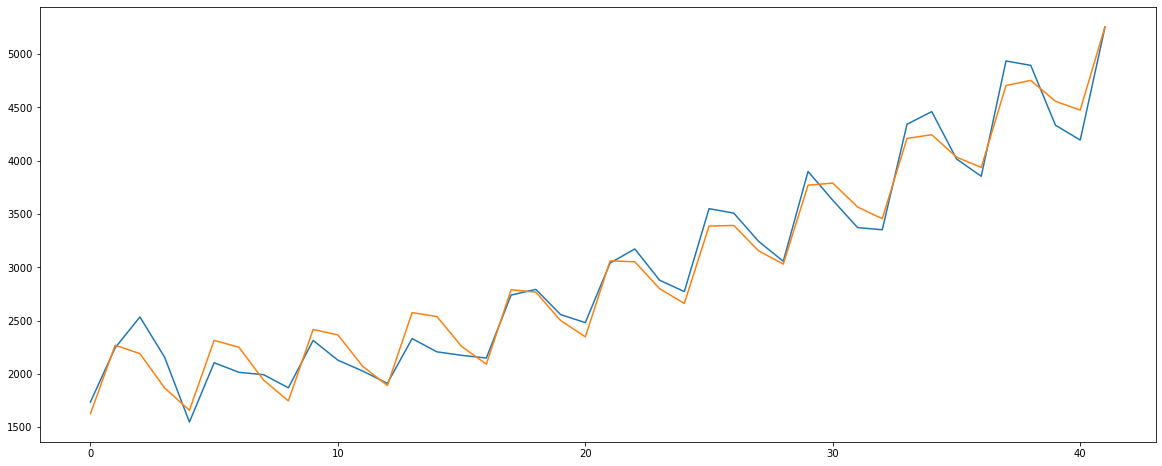

In [54]:
plt.figure(figsize = (20,8))

plt.plot(series[['Sales','forecasted_sales']])

# Forecasting - Data Driven

In [55]:
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 


#### Splitting data

In [56]:
series = pd.read_excel('C:/Users/HP/Desktop/ExcelR/Data Science/Python/Assignments/Forecasting/CocaCola_Sales_Rawdata.xlsx')
series[['q','year']] = series.Quarter.str.split('_', expand=True)
series.year = series.year.astype(int) +1900
series.q = series.q
series.Quarter = pd.to_datetime(series['year'].astype(str) +  series['q'].astype(str))
series = series.drop('q',axis=1)
series = series.drop('year',axis=1)

Train = series.head(34)
Test = series.tail(8)
Train

,Quarter,Sales
0,1986-01-01,1734.827000
1,1986-04-01,2244.960999
2,1986-07-01,2533.804993
3,1986-10-01,2154.962997
4,1987-01-01,1547.818996
5,1987-04-01,2104.411995
6,1987-07-01,2014.362999
7,1987-10-01,1991.746998
8,1988-01-01,1869.049999
9,1988-04-01,2313.631996


In [57]:
Test

,Quarter,Sales
34,1994-07-01,4461.0
35,1994-10-01,4017.0
36,1995-01-01,3854.0
37,1995-04-01,4936.0
38,1995-07-01,4895.0
39,1995-10-01,4333.0
40,1996-01-01,4194.0
41,1996-04-01,5253.0


#### Moving Average 

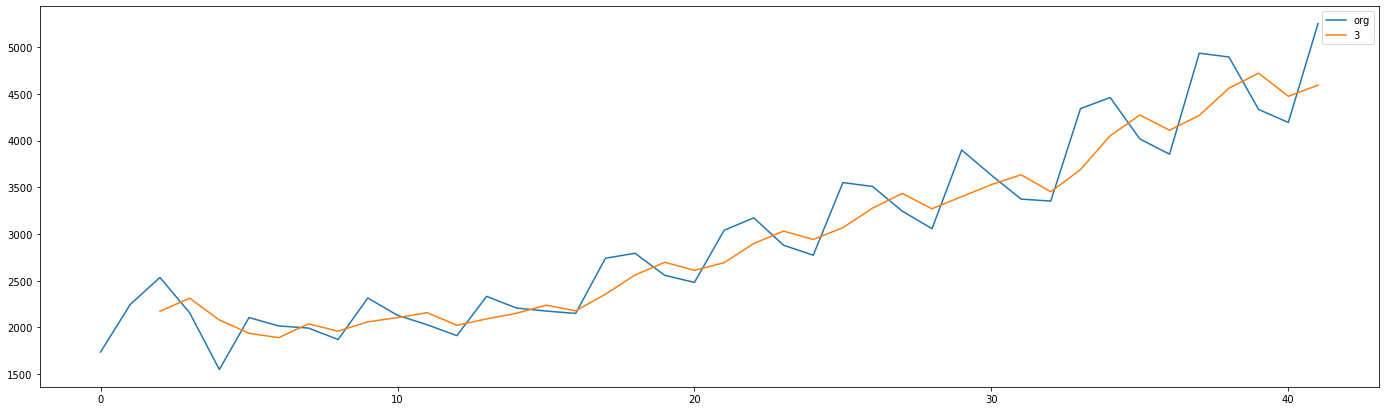

In [58]:
plt.figure(figsize=(24,7))
series['Sales'].plot(label="org")
series["Sales"].rolling(3).mean().plot(label=str(3))
plt.legend(loc='best')

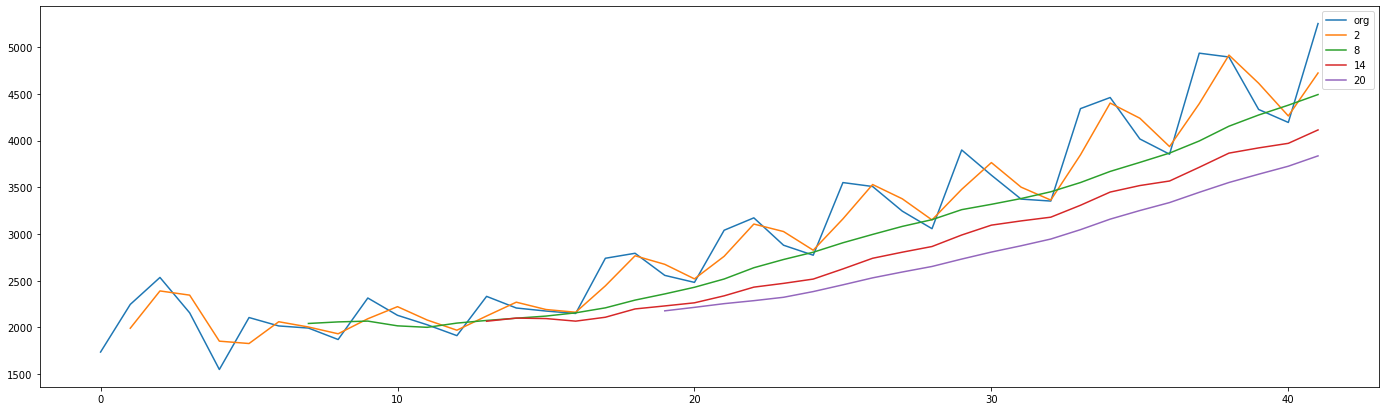

In [59]:
plt.figure(figsize=(24,7))
series['Sales'].plot(label="org")
for i in range(2,24,6):
    series["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

#### Time series decomposition plot 


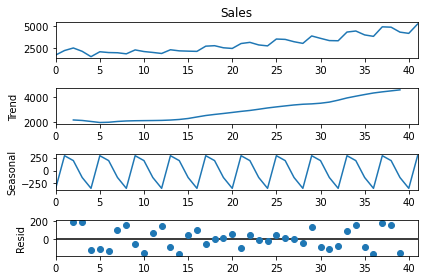

In [60]:
decompose_ts_add = seasonal_decompose(series['Sales'], period = 4)
decompose_ts_add.plot()

plt.show()

#### ACF plots and PACF plots


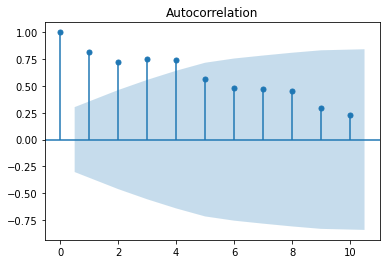

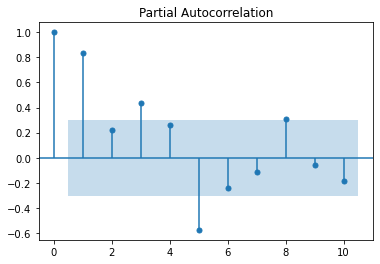

In [61]:
tsa_plots.plot_acf(series.Sales,lags=10)
tsa_plots.plot_pacf(series.Sales,lags=10)
plt.show()

### Evaluation Metric MAPE

In [62]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Method


In [63]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales)

20.62971720565922

### Holt method 

In [64]:
# Holt method 
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) 

10.874453714362792

### Holts winter exponential smoothing with additive seasonality and additive trend


In [65]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales) 

4.156566335224211

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [66]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

5.564932562079917

### Final Model by combining train and test

In [67]:
hwe_model_add_add = ExponentialSmoothing(series["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit()

In [68]:
#Forecasting for next 8 time periods
hwe_model_mul_add.forecast(8)

34    4257.588956
35    3902.312791
36    3662.495681
37    4541.931028
38    4474.887855
39    4207.859549
40    3920.680435
41    4929.171779
dtype: float64

# Forecasting using ARIMA model

In [69]:
# Import libraries
import itertools
from math import sqrt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults

In [70]:
series = pd.read_excel('C:/Users/HP/Desktop/ExcelR/Data Science/Python/Assignments/Forecasting/CocaCola_Sales_Rawdata.xlsx')
series[['q','year']] = series.Quarter.str.split('_', expand=True)
series.year = series.year.astype(int) +1900
series.q = series.q
series.Quarter = pd.to_datetime(series['year'].astype(str) +  series['q'].astype(str))
series = series.drop('q',axis=1)
series = series.drop('year',axis=1)
series.set_index('Quarter', inplace=True,)
series

,Sales
Quarter,
1986-01-01,1734.827000
1986-04-01,2244.960999
1986-07-01,2533.804993
1986-10-01,2154.962997
1987-01-01,1547.818996
1987-04-01,2104.411995
1987-07-01,2014.362999
1987-10-01,1991.746998
1988-01-01,1869.049999


In [71]:
# separate out a validation dataset
split_point = len(series) - 8

dataset, validation = series[0:split_point], series[split_point:]

print('Dataset %d, Validation %d' % (len(dataset), len(validation)))

dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 34, Validation 8


#### Persistence/ Base model

In [72]:
# evaluate a persistence model
# load data
train = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
train

0
1986-01-01    1734.827000
1986-04-01    2244.960999
1986-07-01    2533.804993
1986-10-01    2154.962997
1987-01-01    1547.818996
1987-04-01    2104.411995
1987-07-01    2014.362999
1987-10-01    1991.746998
1988-01-01    1869.049999
1988-04-01    2313.631996
1988-07-01    2128.320000
1988-10-01    2026.828999
1989-01-01    1910.603996
1989-04-01    2331.164993
1989-07-01    2206.549995
1989-10-01    2173.967995
1990-01-01    2148.278000
1990-04-01    2739.307999
1990-07-01    2792.753998
1990-10-01    2556.009995
1991-01-01    2480.973999
1991-04-01    3039.522995
1991-07-01    3172.115997
1991-10-01    2879.000999
1992-01-01    2772.000000
1992-04-01    3550.000000
1992-07-01    3508.000000
1992-10-01    3243.859993
1993-01-01    3056.000000
1993-04-01    3899.000000
1993-07-01    3629.000000
1993-10-01    3373.000000
1994-01-01    3352.000000
1994-04-01    4342.000000
Name: 1, dtype: float64

In [73]:
# prepare data
X = train.values
X

array([1734.82699966, 2244.96099854, 2533.80499268, 2154.96299744,
       1547.81899643, 2104.41199493, 2014.36299896, 1991.74699783,
       1869.04999924, 2313.63199615, 2128.31999969, 2026.82899857,
       1910.60399628, 2331.16499329, 2206.54999542, 2173.96799469,
       2148.27799988, 2739.30799866, 2792.7539978 , 2556.00999451,
       2480.97399902, 3039.522995  , 3172.11599731, 2879.00099945,
       2772.        , 3550.        , 3508.        , 3243.85999298,
       3056.        , 3899.        , 3629.        , 3373.        ,
       3352.        , 4342.        ])

In [74]:
X = X.astype('float32')
X

array([1734.827 , 2244.961 , 2533.805 , 2154.963 , 1547.819 , 2104.412 ,
       2014.363 , 1991.747 , 1869.05  , 2313.632 , 2128.32  , 2026.829 ,
       1910.604 , 2331.165 , 2206.55  , 2173.968 , 2148.278 , 2739.308 ,
       2792.754 , 2556.01  , 2480.9739, 3039.523 , 3172.116 , 2879.001 ,
       2772.    , 3550.    , 3508.    , 3243.86  , 3056.    , 3899.    ,
       3629.    , 3373.    , 3352.    , 4342.    ], dtype=float32)

In [75]:
train_size = int(len(X) * 0.50)
train_size

17

In [76]:
train, test = X[0:train_size], X[train_size:]

In [77]:
train

array([1734.827, 2244.961, 2533.805, 2154.963, 1547.819, 2104.412,
       2014.363, 1991.747, 1869.05 , 2313.632, 2128.32 , 2026.829,
       1910.604, 2331.165, 2206.55 , 2173.968, 2148.278], dtype=float32)

In [78]:
test

array([2739.308 , 2792.754 , 2556.01  , 2480.9739, 3039.523 , 3172.116 ,
       2879.001 , 2772.    , 3550.    , 3508.    , 3243.86  , 3056.    ,
       3899.    , 3629.    , 3373.    , 3352.    , 4342.    ],
      dtype=float32)

In [79]:
# walk-forward validation
history = [x for x in train]
history

[1734.827,
 2244.961,
 2533.805,
 2154.963,
 1547.819,
 2104.412,
 2014.363,
 1991.747,
 1869.05,
 2313.632,
 2128.32,
 2026.829,
 1910.604,
 2331.165,
 2206.55,
 2173.968,
 2148.278]

#### Naive Predictions

In [80]:
predictions = list()

for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    
    # observation
    obs = test[i]
    history.append(obs)
    
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))

>Predicted=2148.278, Expected=2739.308
>Predicted=2739.308, Expected=2792.754
>Predicted=2792.754, Expected=2556.010
>Predicted=2556.010, Expected=2480.974
>Predicted=2480.974, Expected=3039.523
>Predicted=3039.523, Expected=3172.116
>Predicted=3172.116, Expected=2879.001
>Predicted=2879.001, Expected=2772.000
>Predicted=2772.000, Expected=3550.000
>Predicted=3550.000, Expected=3508.000
>Predicted=3508.000, Expected=3243.860
>Predicted=3243.860, Expected=3056.000
>Predicted=3056.000, Expected=3899.000
>Predicted=3899.000, Expected=3629.000
>Predicted=3629.000, Expected=3373.000
>Predicted=3373.000, Expected=3352.000
>Predicted=3352.000, Expected=4342.000


In [81]:
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 446.062


#### ARIMA Hyperparameters

In [82]:
# grid search ARIMA parameters for a time series
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE

def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    
    # make predictions
    predictions = list()
    for i in range(len(test)):
        model = ARIMA(history, order = arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[i])
    
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

#### Grid search for p,d,q values

In [83]:
# evaluate combinations of p, d and q values for an ARIMA model

def evaluate_models(dataset, p_values, d_values, q_values):
    
    dataset = dataset.astype('float32')
    
    best_score, best_cfg = float('inf'), None
    
    for p,d,q in itertools.product(p_values, d_values, q_values):
    #for p in p_values:
    #    for d in d_values:
    #        for q in q_values:
    
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA %s RMSE=%.3f' % (best_cfg, best_score))

In [84]:
# load dataset
train = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
train

0
1986-01-01    1734.827000
1986-04-01    2244.960999
1986-07-01    2533.804993
1986-10-01    2154.962997
1987-01-01    1547.818996
1987-04-01    2104.411995
1987-07-01    2014.362999
1987-10-01    1991.746998
1988-01-01    1869.049999
1988-04-01    2313.631996
1988-07-01    2128.320000
1988-10-01    2026.828999
1989-01-01    1910.603996
1989-04-01    2331.164993
1989-07-01    2206.549995
1989-10-01    2173.967995
1990-01-01    2148.278000
1990-04-01    2739.307999
1990-07-01    2792.753998
1990-10-01    2556.009995
1991-01-01    2480.973999
1991-04-01    3039.522995
1991-07-01    3172.115997
1991-10-01    2879.000999
1992-01-01    2772.000000
1992-04-01    3550.000000
1992-07-01    3508.000000
1992-10-01    3243.859993
1993-01-01    3056.000000
1993-04-01    3899.000000
1993-07-01    3629.000000
1993-10-01    3373.000000
1994-01-01    3352.000000
1994-04-01    4342.000000
Name: 1, dtype: float64

In [85]:
# evaluate parameters
p_values = range(0, 4)
d_values = range(0, 4)
q_values = range(0, 4)

In [86]:
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=939.210
ARIMA(0, 0, 1) RMSE=708.986
ARIMA(0, 0, 2) RMSE=494.434
ARIMA(0, 0, 3) RMSE=551.660
ARIMA(0, 1, 0) RMSE=446.062
ARIMA(0, 1, 1) RMSE=454.570
ARIMA(0, 1, 2) RMSE=433.300
ARIMA(0, 1, 3) RMSE=377.912
ARIMA(0, 2, 0) RMSE=616.833
ARIMA(0, 2, 1) RMSE=440.480
ARIMA(0, 2, 2) RMSE=398.746
ARIMA(0, 2, 3) RMSE=408.598
ARIMA(0, 3, 0) RMSE=938.077
ARIMA(0, 3, 1) RMSE=629.764
ARIMA(0, 3, 2) RMSE=490.841
ARIMA(0, 3, 3) RMSE=406.156
ARIMA(1, 0, 0) RMSE=529.450
ARIMA(1, 0, 1) RMSE=519.386
ARIMA(1, 0, 2) RMSE=467.066
ARIMA(1, 0, 3) RMSE=480.818
ARIMA(1, 1, 0) RMSE=444.920
ARIMA(1, 1, 1) RMSE=450.666
ARIMA(1, 1, 2) RMSE=428.426
ARIMA(1, 1, 3) RMSE=393.145
ARIMA(1, 2, 0) RMSE=609.044
ARIMA(1, 2, 1) RMSE=438.264
ARIMA(1, 2, 2) RMSE=413.140
ARIMA(1, 2, 3) RMSE=416.476
ARIMA(1, 3, 0) RMSE=859.547
ARIMA(1, 3, 1) RMSE=623.419
ARIMA(1, 3, 2) RMSE=555.384
ARIMA(1, 3, 3) RMSE=480.711
ARIMA(2, 0, 0) RMSE=545.402
ARIMA(2, 0, 1) RMSE=528.184
ARIMA(2, 0, 2) RMSE=470.148
ARIMA(2, 0, 3) RMSE=

#### Build Model based on the optimized values

In [87]:
# save finalized model to file
# load data
train = pd.read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
train

,1734.8269996643066
1986-01-01,
1986-04-01,2244.960999
1986-07-01,2533.804993
1986-10-01,2154.962997
1987-01-01,1547.818996
1987-04-01,2104.411995
1987-07-01,2014.362999
1987-10-01,1991.746998
1988-01-01,1869.049999
1988-04-01,2313.631996


In [88]:
# prepare data
X = train.values
X = X.astype('float32')

In [89]:
# fit model
model = ARIMA(X, order=(3,2,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps = 8)
forecast

array([4010.35036565, 3772.59913589, 3866.68824206, 4775.60090155,
       4390.02330379, 4184.55689465, 4379.16312558, 5200.07396624])

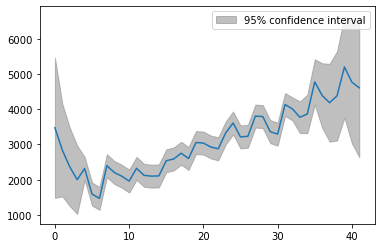

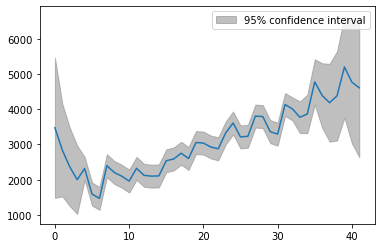

In [90]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model_fit,1,42)

In [91]:
#Error on the test data
val = pd.read_csv('validation.csv', header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

274.5061713664878

#### Combine train and test data and build final model

In [92]:
# fit model
series = pd.read_excel('C:/Users/HP/Desktop/ExcelR/Data Science/Python/Assignments/Forecasting/CocaCola_Sales_Rawdata.xlsx')
series[['q','year']] = series.Quarter.str.split('_', expand=True)
series.year = series.year.astype(int) +1900
series.q = series.q
series.Quarter = pd.to_datetime(series['year'].astype(str) +  series['q'].astype(str))
series = series.drop('q',axis=1)
series = series.drop('year',axis=1)
series.set_index('Quarter', inplace=True,)
series

# prepare data
X = series.values
X = X.astype('float32')

In [93]:
model = ARIMA(X, order=(3,2,0))
model_fit = model.fit()

In [94]:
forecast=model_fit.forecast(steps=8)
forecast

array([5199.80177626, 4631.06359601, 4554.78840998, 5570.3882082 ,
       5503.02750399, 4932.46233688, 4913.51349969, 5887.93959407])

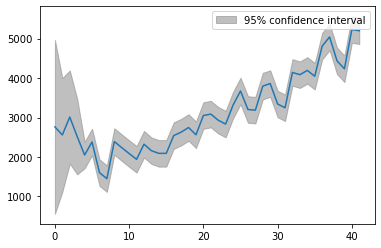

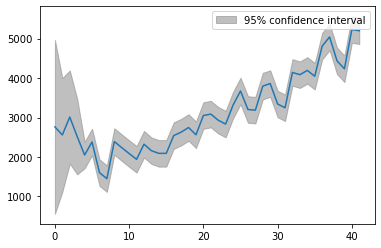

In [95]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model_fit,1,42)